<div>
<h1><center><b>Credit card fraud Detection</b> </center><h1>
<p><center>  <img width="800" height="200" src="https://blog.malwarebytes.com/wp-content/uploads/2017/11/shutterstock_248842327.jpg"></center> </p>
    </div><b>Credit card fraud</b> is on rise.Credit card scammers are getting smarter - they use all sorts of tricks, from phony calls and emails to credit card skimmers and wifi hotspots- to obtain your personal information.You could be a victim of credit card scam and not even know it... </p>    
    </div>
    <div>So, here we are performing a task to predict the fraudulent or non-fraudulent with the <a src ="https://www.kaggle.com/mlg-ulb/creditcardfraud">dataset</a> which are available @ Kaggle using some machine learning algorithmns..... </div>

In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/home/rohit_psspl/Desktop/machine learning projects/credit card fraud detection/creditcard.csv")

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.isnull().sum().sum()

0

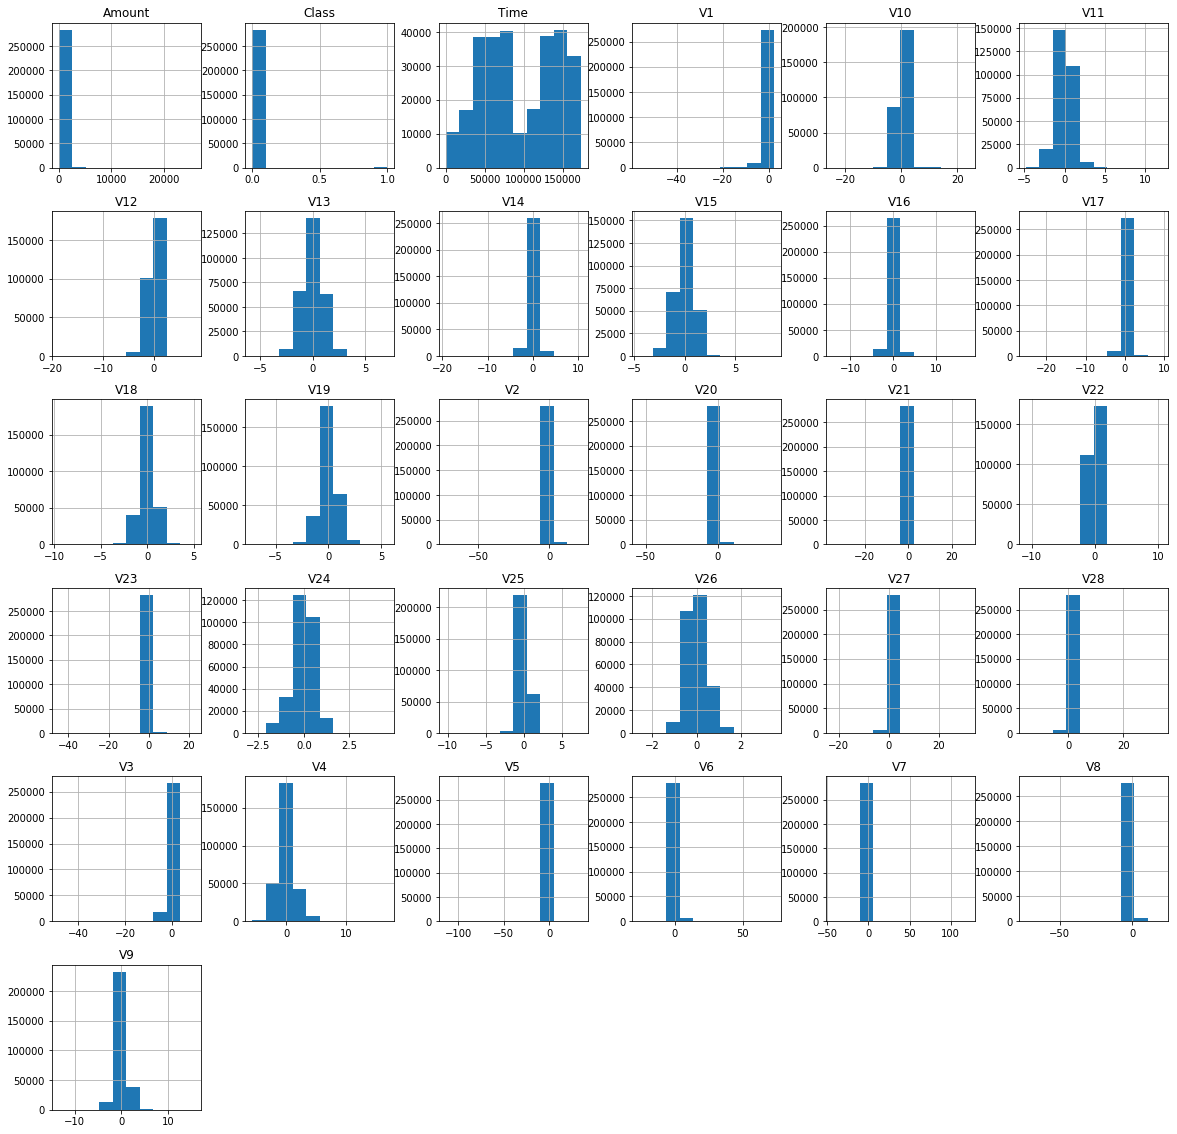

In [7]:
data.hist(figsize = (20,20))
plt.show()

Text(0, 0.5, 'frequency')

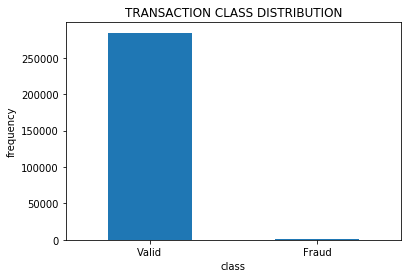

In [8]:
label = ["Valid","Fraud"]
count_classes = pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("TRANSACTION CLASS DISTRIBUTION")
plt.xticks(range(2), labels=label)
plt.xlabel("class")
plt.ylabel("frequency")

In [9]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
print("fraud : ", fraud.shape[0],"\n","Valid : ",valid.shape[0])

fraud :  492 
 Valid :  284315


In [10]:
X = data.drop("Class",axis=1)
y = data['Class']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.33, random_state=42)

In [13]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211399,138395.0,1.914230,0.067770,-2.083358,0.055530,1.485432,1.190085,-0.018685,0.297667,0.295323,-0.608548,1.502239,1.578678,1.073598,-0.889834,0.332302,-0.449591,0.883675,-0.846479,-0.518716,-0.161112,-0.225442,-0.402688,0.277025,-1.054116,-0.212473,-0.506178,0.050672,-0.039590,9.99
245040,152583.0,0.036197,0.740779,0.259483,-0.577140,0.293864,-1.082815,0.880215,-0.086953,0.206009,-0.369385,-1.159282,-0.724816,-1.653837,0.448182,-0.173889,-0.074275,-0.257243,-0.634275,-0.144256,-0.154281,-0.274523,-0.683595,0.093140,-0.065410,-0.561037,0.149022,0.239967,0.093198,1.79
97433,66218.0,1.557485,-0.902443,0.111260,-1.521689,-1.031020,-0.515053,-0.816003,-0.280923,-2.002913,1.395496,-0.985793,-0.403895,2.056395,-0.635515,0.474574,-0.222143,0.124396,0.060298,0.057824,-0.188295,-0.246302,-0.267493,-0.095989,-0.439016,0.542596,-0.160123,0.035973,0.017469,25.00
94007,64687.0,1.219903,-0.879515,0.111133,-0.798061,-0.750800,-0.143288,-0.563416,0.011703,-0.615117,0.544840,-0.748361,-1.134753,-0.527457,0.020447,1.224388,1.207766,0.282927,-1.669471,0.497049,0.211339,-0.064199,-0.537626,-0.003087,-0.683997,0.188807,-0.414862,0.001200,0.027695,109.35


In [14]:
from sklearn.linear_model import LogisticRegression 

In [15]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
LR.score(X_train,y_train)

0.9986793837123992

In [17]:
LR.score(X_test,y_test)

0.9987657867577431

In [18]:
y_pred = LR.predict(X_test)

In [19]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy = accuracy_score(y_test,y_pred)

In [22]:
accuracy

0.9987657867577431

In [23]:
Predicted = pd.DataFrame({'Amount':X_test['Amount'],"Fraud/valid predicted":y_pred})

In [24]:
Predicted

,Amount,Fraud/valid predicted
43428,364.19,1
49906,520.12,0
29474,31.00,0
276481,1.50,0
278846,0.89,0
...,...,...
211399,9.99,0
245040,1.79,0
97433,25.00,0
94007,109.35,0


In [25]:
Predicted.to_csv('fraud detection.csv',index=False)
